- pyecharts，seaborn 如何快速进行数据可视化
- list 列表推导，dict 类型数据排序， [walk](https://www.runoob.com/python/os-walk.html) 文件遍历操作，[glob](https://www.pynote.net/archives/852) 文件匹配处理

## 1.数据集文件初探

In [1]:
import os
from os import walk

base_path = '../data'
data_path = os.path.join(base_path, 'garbage_classify/train_data')

# 数据路径
print('data_path = ', data_path)

for (dirpath, dirnames, filenames) in walk(data_path):
    print('*' * 60)
    
    print('Directory path:', dirpath)
    print('total examples:', len(filenames))
    print('file name example:', filenames[:5]) # 文件列表

data_path =  ../data/garbage_classify/train_data
************************************************************
Directory path: ../data/garbage_classify/train_data
total examples: 29604
file name example: ['img_19473.jpg', 'img_6429.jpg', 'img_15935.txt', 'img_16446.txt', 'img_2583.txt']


我们需要分析 *.txt，然后取出所有的img_ .txt

首先，需要匹配所有的 .txt文件进行输出

In [2]:
from glob import glob

def get_image_info():
    
    data_path_txt = os.path.join(data_path, '*.txt') # data_path + *.txt
    txt_file_list = glob(data_path_txt)
#     print(txt_file_list) # 所有.txt文件的目录
    
    img_path_list = []
    img_name2label_dict = {} # {img_name:img_label}
    img_label_dict = {} # {img_label:img_count}
    # 遍历所有txt文件的路径名
    for file_path in txt_file_list:
        
        # 读取txt文件中的内容
        with open(file_path, 'r') as f:
            line = f.readline()
#         print(line)
        img_name, img_label = line.split(', ')[0], int(line.split(', ')[1])
        
        img_name_path = os.path.join(data_path, img_name) # 图片的完整路径
        img_path_list.append({'img_name_path':img_name_path, 'img_label':img_label})        
        
        
        img_name2label_dict[img_name] = img_label
        
        
        img_label_count = img_label_dict.get(img_label, 0)
        if img_label_count:
            img_label_dict[img_label] = img_label_count + 1
        else:
            img_label_dict[img_label] = 1
    
    return img_path_list, img_label_dict, img_name2label_dict

In [3]:
img_path_list, img_label_dict, img_name2label_dict = get_image_info()
print('img_path_list:', img_path_list[:3])
print('img_label_dict:', img_label_dict)
print('img_label_dict len:', len(img_label_dict))

img_path_list: [{'img_name_path': '../data/garbage_classify/train_data/img_15935.jpg', 'img_label': 31}, {'img_name_path': '../data/garbage_classify/train_data/img_16446.jpg', 'img_label': 33}, {'img_name_path': '../data/garbage_classify/train_data/img_2583.jpg', 'img_label': 6}]
img_label_dict: {31: 446, 33: 322, 6: 395, 8: 380, 21: 657, 11: 736, 27: 536, 35: 351, 32: 280, 4: 387, 20: 226, 26: 351, 9: 389, 19: 312, 29: 416, 38: 391, 24: 318, 15: 419, 12: 331, 10: 387, 25: 550, 0: 242, 22: 375, 13: 409, 36: 265, 37: 322, 28: 382, 7: 362, 34: 395, 2: 279, 39: 437, 1: 370, 18: 362, 5: 289, 16: 352, 30: 321, 17: 309, 14: 357, 3: 85, 23: 309}
img_label_dict len: 40


## 2.不同类别数量可视化

x 轴数据: 标签名称

y 轴数据: 对应的个数

首先我们对 img_label_dict 按照 key进行排序

In [4]:
label_dict={
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}

In [5]:
img_label_dict = dict(sorted(img_label_dict.items()))

x = ['{}-{}'.format(label_idx, label_dict[str(label_idx)])
     for label_idx in img_label_dict.keys()]

y = list(img_label_dict.values())

print(x)

['0-其他垃圾/一次性快餐盒', '1-其他垃圾/污损塑料', '2-其他垃圾/烟蒂', '3-其他垃圾/牙签', '4-其他垃圾/破碎花盆及碟碗', '5-其他垃圾/竹筷', '6-厨余垃圾/剩饭剩菜', '7-厨余垃圾/大骨头', '8-厨余垃圾/水果果皮', '9-厨余垃圾/水果果肉', '10-厨余垃圾/茶叶渣', '11-厨余垃圾/菜叶菜根', '12-厨余垃圾/蛋壳', '13-厨余垃圾/鱼骨', '14-可回收物/充电宝', '15-可回收物/包', '16-可回收物/化妆品瓶', '17-可回收物/塑料玩具', '18-可回收物/塑料碗盆', '19-可回收物/塑料衣架', '20-可回收物/快递纸袋', '21-可回收物/插头电线', '22-可回收物/旧衣服', '23-可回收物/易拉罐', '24-可回收物/枕头', '25-可回收物/毛绒玩具', '26-可回收物/洗发水瓶', '27-可回收物/玻璃杯', '28-可回收物/皮鞋', '29-可回收物/砧板', '30-可回收物/纸板箱', '31-可回收物/调料瓶', '32-可回收物/酒瓶', '33-可回收物/金属食品罐', '34-可回收物/锅', '35-可回收物/食用油桶', '36-可回收物/饮料瓶', '37-有害垃圾/干电池', '38-有害垃圾/软膏', '39-有害垃圾/过期药物']


In [6]:
from pyecharts import options as opts
from pyecharts.charts import Bar

# 创建pyecharts的Bar 实例对象
bar = Bar(init_opts=opts.InitOpts(width='1100px', height='500px'))

# 填充数据
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='',yaxis_data=y)

# 设置一些全局参数
bar.set_global_opts(
    # 增加标题描述
    title_opts=opts.TitleOpts(title='不同类别垃圾数据分布'),
    # 让x轴数据倾斜
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=15)),                
)

# show
bar.render_notebook()

## 3.图片长宽比例分布可视化

使用 [PIL](https://blog.csdn.net/dcrmg/article/details/102963336) 获取JPG图片的长宽信息

In [7]:
from PIL import Image

# 获取一张图片的路径
pic_file_name = os.path.join(data_path, 'img_1.jpg')

# 获取长度和高度
img = Image.open(pic_file_name)
print('img.size = ', img.size)

img.size =  (800, 575)


获取所有JPG图片

In [8]:
data_path_jpg = os.path.join(data_path, '*.jpg')
data_path_list = glob(data_path_jpg)
data_list = []

for file_path in data_path_list:
    img = Image.open(file_path)
    width, height = img.size[0], img.size[1]
    ratio = float("{:.2f}".format(width / height))
    
    img_name = file_path.split('/')[-1] # img_xx.jpg
    img_id = img_name.split('.')[0].split('_')[1] # xx
    img_label = img_name2label_dict.get(img_name)
    data_list.append([int(img_id), width, height, ratio, int(img_label)])

用 seaborn 画直方图，对单变量进行分析

In [9]:
ratio_list = [ratio[3] for ratio in data_list]

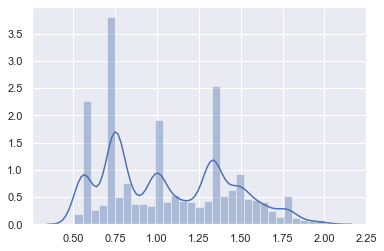

In [12]:
import seaborn as sns
import numpy as np

sns.set()
np.random.seed(0)

# seaborn直方图展示
ax = sns.distplot(ratio_list)

只查看(0, 2)的数据，其他的先不看

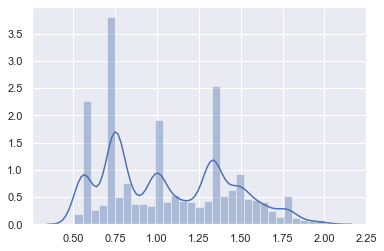

In [13]:
ratio_list = list(filter(lambda x: x>0.5 and x<=2, ratio_list))

sns.set()
np.random.seed(0)

# seaborn直方图展示
ax = sns.distplot(ratio_list)

## 4.切分Train data, Test data, Val data

In [14]:
print(len(img_path_list))
print(img_path_list[:2])

14802
[{'img_name_path': '../data/garbage_classify/train_data/img_15935.jpg', 'img_label': 31}, {'img_name_path': '../data/garbage_classify/train_data/img_16446.jpg', 'img_label': 33}]


In [15]:
# 对原始数据集进行shuffle
from random import shuffle
shuffle(img_path_list)

# 数据集拆分 0.8 & 0.2
img_count = len(img_path_list)

train_size = int(img_count * 0.8)

train_img_list = img_path_list[:train_size]
val_img_list = img_path_list[train_size:]

print('train_img_list size =', len(train_img_list))
print('val_img_list size =', len(val_img_list))

train_img_list size = 11841
val_img_list size = 2961


获取图片

In [17]:
import shutil
# train data
with open(os.path.join(base_path, '40_garbage-classify-for-pytorch/train.txt'), 'w') as f:
    for img_dict in train_img_list:
        
        # 文本数据格式
        img_name_path = img_dict['img_name_path']
        img_label = img_dict['img_label']
        f.write("{}\t{}\n".format(img_name_path, img_label))
        
        # 图片-标签目录
        garbage_classify_dir = os.path.join(base_path, '40_garbage-classify-for-pytorch/train/{}'.format(img_label))
        
        # 目录创建
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
            
        # copy图片
        shutil.copy(img_name_path, garbage_classify_dir)
        
# val data
with open(os.path.join(base_path, '40_garbage-classify-for-pytorch/val.txt'), 'w') as f:
    for img_dict in val_img_list:
        
        # 文本数据格式
        img_name_path = img_dict['img_name_path']
        img_label = img_dict['img_label']
        f.write("{}\t{}\n".format(img_name_path, img_label))
        
        # 图片-标签目录
        garbage_classify_dir = os.path.join(base_path, '40_garbage-classify-for-pytorch/val/{}'.format(img_label))
        
        # 目录创建
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
            
        # copy图片
        shutil.copy(img_name_path, garbage_classify_dir)

## 5.训练数据和验证数据分布可视化

统计训练集和测试集不同类别的个数 <label, count>

In [20]:
import codecs
train_path = os.path.join(base_path, '40_garbage-classify-for-pytorch/train.txt')
val_path = os.path.join(base_path, '40_garbage-classify-for-pytorch/val.txt')


# 统计<label, count>
def get_label_idx_list(data_path):
    label_idx_list = []
    
    for line in codecs.open(data_path, 'r'):
        line = line.strip()
        label_idx = line.split('\t')[1]
        label_idx_list.append(int(label_idx))
    return label_idx_list


# Counter 统计 label 出现次数
from collections import Counter
train_dict = dict(Counter(get_label_idx_list(train_path)))
train_dict = dict(sorted(train_dict.items()))

val_dict = dict(Counter(get_label_idx_list(val_path)))
val_dict = dict(sorted(val_dict.items()))

In [23]:
# 可视化
from pyecharts import options as opts
from pyecharts.charts import Bar

# 构建数据

## check train.keys == val.keys
assert train_dict.keys() == val_dict.keys()

x = list(train_dict.keys())
x = ['{}-{}'.format(label_idx, label_dict[str(label_idx)])
     for label_idx in train_dict.keys()]

## train
train_y = list(train_dict.values())

## val
val_y = list(val_dict.values())

# 创建Bar实例
bar = Bar(init_opts=opts.InitOpts(width='1100px', height='500px'))
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='Train', yaxis_data=train_y)
bar.add_yaxis(series_name='Val', yaxis_data=val_y)

# 设置全局变量
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='垃圾分类 Train/Val 不同类别数据分布'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=15)),
)

# show
bar.render_notebook()